In [8]:
# the needed libraries

import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Importing the raw data
# I got the data from outscraper.com

YellowBar = pd.read_csv('DYellowBar.csv')
Scholars = pd.read_csv('DScholars.csv')
SanCalisto = pd.read_csv('DSanCalisto.csv')
DrunkenShip = pd.read_csv('DDrunkenship.csv')

In [12]:
# DOOOO NOOOOT RUUUUUN, it's for transalion of all the data, takes more than an hour!
# Translating and saving comments into files

from googletrans import Translator
from tqdm import tqdm
import pandas as pd

# Initialize the translator object
translator = Translator()

def review_translator(review_text):
    try:
        # Translate the text to English (source='auto' will detect the source language)
        translated = translator.translate(review_text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        return None  # Handle unexpected errors gracefully

def review_language_detect(review_text):
    if not review_text or len(str(review_text)) < 5:
        return None
    try:
        # Detect the language of the review text
        detected = translator.detect(review_text)
        return detected.lang  # This returns the language code
    except Exception as e:
        return None  # Handle errors gracefully

# Track the translation process
tqdm.pandas()

# Apply the functions to the review text column
Scholars['review_text_translated'] = Scholars['review_text'].progress_apply(review_translator)
Scholars['review_text_language'] = Scholars['review_text'].progress_apply(review_language_detect)
Scholars.to_csv('TScholars.CSV', index=False)

SanCalisto['review_text_translated'] = SanCalisto['review_text'].progress_apply(review_translator)
SanCalisto['review_text_language'] = SanCalisto['review_text'].progress_apply(review_language_detect)
SanCalisto.to_csv('TSanCalisto.CSV', index=False)

DrunkenShip['review_text_translated'] = DrunkenShip['review_text'].progress_apply(review_translator)
DrunkenShip['review_text_language'] = DrunkenShip['review_text'].progress_apply(review_language_detect)
DrunkenShip.to_csv('TDrunkenShip.CSV', index=False)

100%|███████████████████████████████████████| 1029/1029 [02:35<00:00,  6.61it/s]


In [10]:
YellowBar = pd.read_csv('TYellowBar.csv')
Scholars = pd.read_csv('TScholars.csv')
SanCalisto = pd.read_csv('TSanCalisto.csv')
DrunkenShip = pd.read_csv('TDrunkenship.csv')

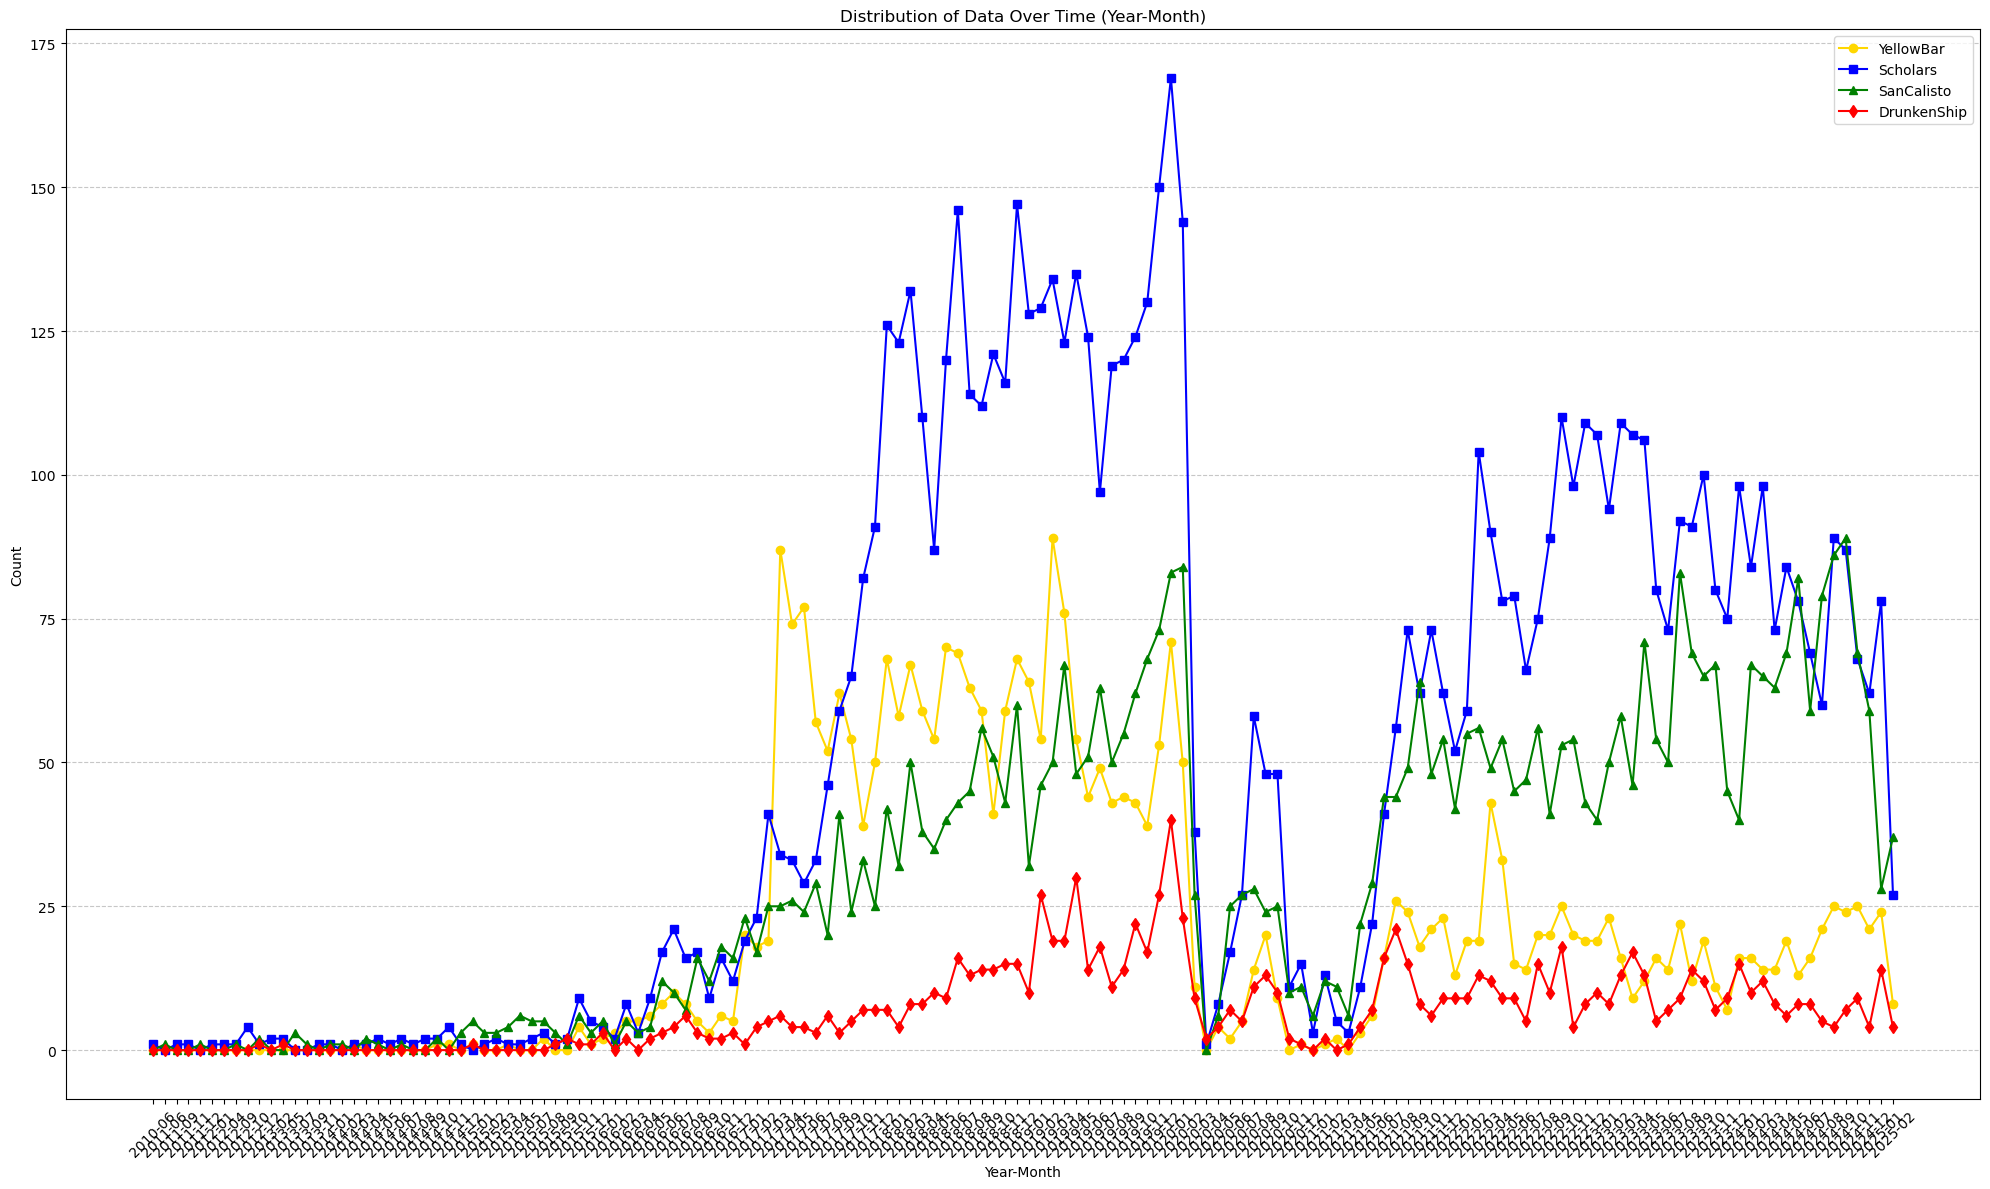

In [12]:
#Plotting the Time Distributios 

# Ensure timestamps are in datetime format
YellowBar['review_datetime_utc'] = pd.to_datetime(YellowBar['review_datetime_utc'])
Scholars['review_datetime_utc'] = pd.to_datetime(Scholars['review_datetime_utc'])
SanCalisto['review_datetime_utc'] = pd.to_datetime(SanCalisto['review_datetime_utc'])
DrunkenShip['review_datetime_utc'] = pd.to_datetime(DrunkenShip['review_datetime_utc'])

# Extract year and month
YellowBar['year_month'] = YellowBar['review_datetime_utc'].dt.to_period('M')
Scholars['year_month'] = Scholars['review_datetime_utc'].dt.to_period('M')
SanCalisto['year_month'] = SanCalisto['review_datetime_utc'].dt.to_period('M')
DrunkenShip['year_month'] = DrunkenShip['review_datetime_utc'].dt.to_period('M')

# Count occurrences of each year-month
month_counts_YB = YellowBar['year_month'].value_counts().sort_index()
month_counts_SC = Scholars['year_month'].value_counts().sort_index()
month_counts_SanC = SanCalisto['year_month'].value_counts().sort_index()
month_counts_DS = DrunkenShip['year_month'].value_counts().sort_index()

# Combine data to align indexes
all_months = month_counts_YB.index.union(month_counts_SC.index)
all_months = all_months.union(month_counts_SanC.index)
all_months = all_months.union(month_counts_DS.index)

month_counts_YB = month_counts_YB.reindex(all_months, fill_value=0)
month_counts_SC = month_counts_SC.reindex(all_months, fill_value=0)
month_counts_SanC = month_counts_SanC.reindex(all_months, fill_value=0)
month_counts_DS = month_counts_DS.reindex(all_months, fill_value=0)

# Convert index to string for plotting
month_labels = all_months.astype(str)

# Plot
plt.figure(figsize=(20, 12))
plt.plot(month_labels, month_counts_YB, marker='o', linestyle='-', label='YellowBar', color='gold')
plt.plot(month_labels, month_counts_SC, marker='s', linestyle='-', label='Scholars', color='blue')
plt.plot(month_labels, month_counts_SanC, marker='^', linestyle='-', label='SanCalisto', color='green')
plt.plot(month_labels, month_counts_DS, marker='d', linestyle='-', label='DrunkenShip', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Distribution of Data Over Time (Year-Month)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for better display of x-ticks
plt.show()

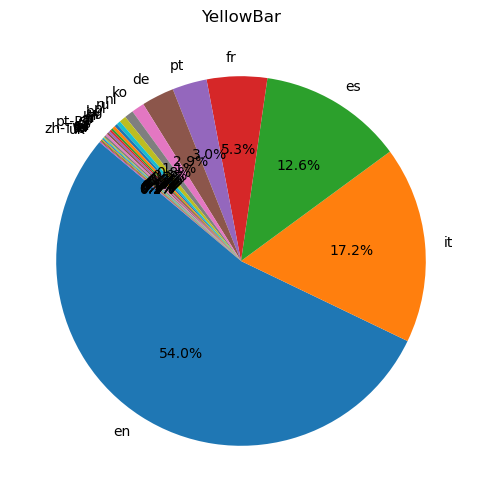

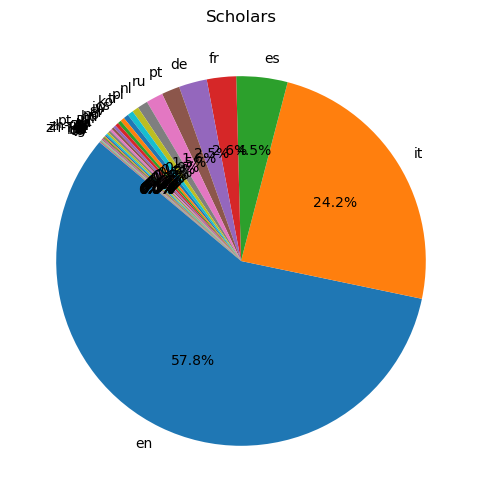

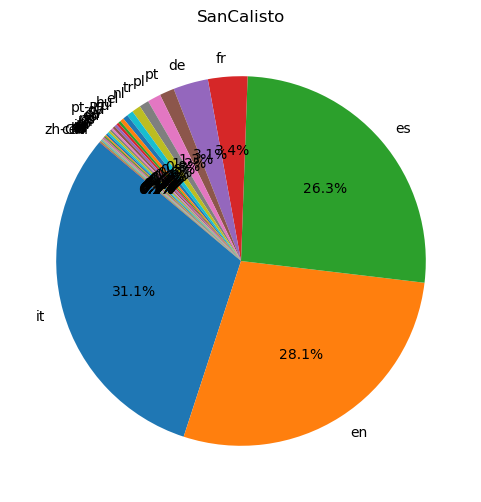

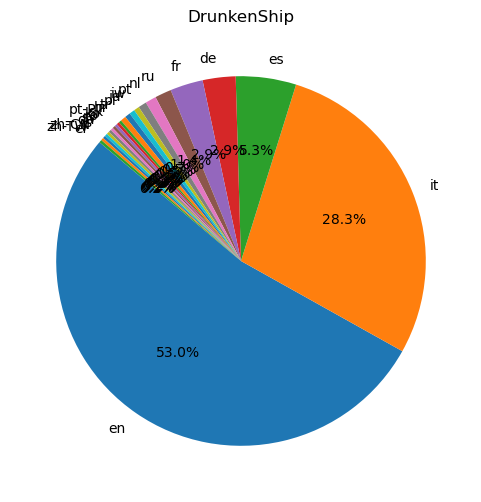

In [21]:
#The language distribution

import matplotlib.pyplot as plt

counts = YellowBar['review_text_language'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("YellowBar")
plt.show()

counts = Scholars['review_text_language'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Scholars")
plt.show()

counts = SanCalisto['review_text_language'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("SanCalisto")
plt.show()

counts = DrunkenShip['review_text_language'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("DrunkenShip")
plt.show()


### Extracting data for the analysis Matrixes:



| key sucsess factors  |  weight |
|-------|----------|
| place  | 4     |
| Staff  | 3     |
| Atmosphere  | 3     |
| Drinks  | 2     |



In [263]:
# Extracting the Comments Related to each Susccess Factor

YLPlc = YellowBar[YellowBar['review_text_translated'].fillna("").str.contains("place", case=False)]
SCPlc = Scholars[Scholars['review_text_translated'].fillna("").str.contains("place", case=False)]
SNPlc = SanCalisto[SanCalisto['review_text_translated'].fillna("").str.contains("place", case=False)]
DSPlc = DrunkenShip[DrunkenShip['review_text_translated'].fillna("").str.contains("place", case=False)]

YLStf = YellowBar[YellowBar['review_text_translated'].fillna("").str.contains("staff", case=False)]
SCStf = Scholars[Scholars['review_text_translated'].fillna("").str.contains("staff", case=False)]
SNStf = SanCalisto[SanCalisto['review_text_translated'].fillna("").str.contains("staff", case=False)]
DSStf = DrunkenShip[DrunkenShip['review_text_translated'].fillna("").str.contains("staff", case=False)]

YLAtm = YellowBar[YellowBar['review_text_translated'].fillna("").str.contains("atmosphere", case=False)]
SCAtm = Scholars[Scholars['review_text_translated'].fillna("").str.contains("atmosphere", case=False)]
SNAtm = SanCalisto[SanCalisto['review_text_translated'].fillna("").str.contains("atmosphere", case=False)]
DSAtm = DrunkenShip[DrunkenShip['review_text_translated'].fillna("").str.contains("atmosphere", case=False)]

YLDr = YellowBar[YellowBar['review_text_translated'].fillna("").str.contains("drinks", case=False)]
SCDr = Scholars[Scholars['review_text_translated'].fillna("").str.contains("drinks", case=False)]
SNDr = SanCalisto[SanCalisto['review_text_translated'].fillna("").str.contains("drinks", case=False)]
DSDr = DrunkenShip[DrunkenShip['review_text_translated'].fillna("").str.contains("drinks", case=False)]

Place = len(YLPlc) + len(SCPlc) +  len(SNPlc) + len(DSPlc)
Staff = len(YLStf) + len(SCStf) +  len(SNStf) + len(DSStf)
Atm = len(YLAtm) + len(SCAtm) +  len(SNAtm) + len(DSAtm)
Drinks = len(YLDr) + len(SCDr) +  len(SNDr) + len(DSDr)

Place, Staff, Atm, Drinks


(1750, 891, 984, 503)

In [247]:
# Making the whole reviews data to json objects to use them in API

YLPlc = YLPlc['review_text_translated'].to_json()
SCPlc = SCPlc['review_text_translated'].to_json()
SNPlc = SNPlc['review_text_translated'].to_json()
DSPlc = DSPlc['review_text_translated'].to_json()

YLStf = YLStf['review_text_translated'].to_json()
SCStf = SCStf['review_text_translated'].to_json()
SNStf = SNStf['review_text_translated'].to_json()
DSStf = DSStf['review_text_translated'].to_json()

YLAtm = YLAtm['review_text_translated'].to_json()
SCAtm = SCAtm['review_text_translated'].to_json()
SNAtm = SNAtm['review_text_translated'].to_json()
DSAtm = DSAtm['review_text_translated'].to_json()

YLDr = YLDr['review_text_translated'].to_json()
SCDr = SCDr['review_text_translated'].to_json()
SNDr = SNDr['review_text_translated'].to_json()
DSDr = DSDr['review_text_translated'].to_json()

In [259]:
from openai import OpenAI

client = OpenAI(
    api_key = "Your Key"
)  

stream = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": f"given this file, which is the rivew's about a bar, only reply me with  total number of reviews, number of good reviews and number of bad reviews: {DSAtm}"}],
    stream=True,
)
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

Total number of reviews: 33  
Number of good reviews: 28  
Number of bad reviews: 5

Place indices:

yellow : 47%, 67%, 77% = 64% 
Scholars : 50%, 40%, 34% = 41%
San Calisto : 65%, 77%, 60% = 67%
Drunken ship : 34%, 24%, 26% = 28%

Staff indices:

yellow : 81%, 75%, 97% = 84% 
Scholars : 86%, 73%, 88% = 82%
San Calisto : 100%, 100%, 100% = 100%
Drunken ship : 43%, 58%, 51% = 50%

Atmosphere indices:

yellow : 61%, 76%, 53% = 63% 
Scholars : 59%, 64%, 48% = 57%
San Calisto : 97%, 90%, 93% = 93%
Drunken ship : 34%, 24%, 26% = 28%

Drink indices:

yellow : 80%, 77%, 68% = 77% 
Scholars : 58%, 64%, 56% = 59% 
San Calisto : 78%, 87%, 84% = 83% 
Drunken ship : 67%, 67%, 69% = 67% 



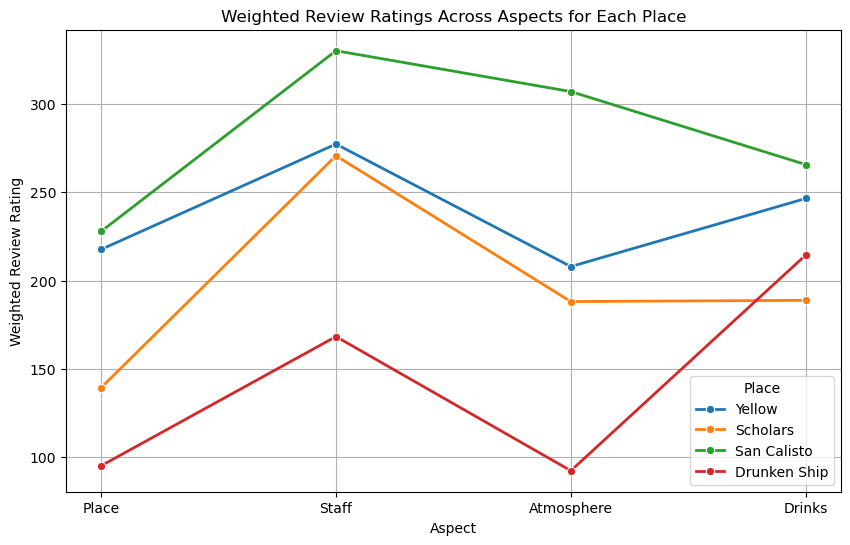

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed values for each place and aspect
places = {
    "Yellow": {"Place": 64, "Staff": 84, "Atmosphere": 63, "Drinks": 77},
    "Scholars": {"Place": 41, "Staff": 82, "Atmosphere": 57, "Drinks": 59},
    "San Calisto": {"Place": 67, "Staff": 100, "Atmosphere": 93, "Drinks": 83},
    "Drunken Ship": {"Place": 28, "Staff": 51, "Atmosphere": 28, "Drinks": 67},
}

# Weight factors for each aspect
weights = {
    "Place": 3.4,
    "Staff": 3.3,
    "Atmosphere": 3.3,
    "Drinks": 3.2
}

# Prepare data for Seaborn
data = {
    "Place": [],
    "Aspect": [],
    "Weighted Review Rating": []
}

# Apply weights and organize the data
for place_name, aspects in places.items():
    for aspect_name, value in aspects.items():
        weight = weights[aspect_name]  # Get weight for the current aspect
        weighted_value = value * weight  # Apply the weight to the value
        data["Place"].append(place_name)
        data["Aspect"].append(aspect_name)
        data["Weighted Review Rating"].append(weighted_value)

# Convert to DataFrame
df_plot = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, x="Aspect", y="Weighted Review Rating", hue="Place", marker="o", linewidth=2)

# Customize the plot
plt.xlabel("Aspect")
plt.ylabel("Weighted Review Rating")
plt.title("Weighted Review Ratings Across Aspects for Each Place")
plt.legend(title="Place")
plt.grid(True)

# Show plot
plt.show()


In [160]:
# Left this Cell for you to see How O1 is trying to trick us!


from openai import OpenAI

client = OpenAI(
    api_key = "Your Key"
)

# List of files to process
files = [SCPlc, SNPlc, DSPlc]  # Replace with actual file names

# Process each file
for file in files:
    for i in range(0, 3):
        stream = client.chat.completions.create(
            model="o1-mini",
            messages=[{"role": "user", "content": f"Given this file, which contains reviews about a bar, only reply with: total number of reviews, number of good reviews, and number of bad reviews: {file}"}],
            stream=True,
        )
    
        print(f"\nResults:")
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                print(chunk.choices[0].delta.content, end="")
        print("\n" + "-"*50)  # Separator for readability



Results:
Total number of reviews: 189  
Number of good reviews: 160  
Number of bad reviews: 30
--------------------------------------------------

Results:
- **Total number of reviews:** 800
- **Number of good reviews:** 600
- **Number of bad reviews:** 200
--------------------------------------------------

Results:
Total number of reviews: 800  
Number of good reviews: 300  
Number of bad reviews: 500
--------------------------------------------------

Results:
Total number of reviews: 500  
Number of good reviews: 450  
Number of bad reviews: 50
--------------------------------------------------

Results:


KeyboardInterrupt: 

In [275]:
import pandas as pd

# Example: Assuming you have these DataFrames already defined
dfs = {
    "Yellow place": YLPlc,
    "Scholars place": SCPlc,
    "San Calisto Place": SNPlc,
    "Drunken Ship place": DSPlc,
    "Yellow Staff": YLStf,
    "Scholars Staff": SCStf,
    "San Calisto Staff": SNStf,
    "Drunken Ship Staff": DSStf,
    "Yellow Atmosphere": YLAtm,
    "Scholars Atmosphere": SCAtm,
    "San Calisto Atmosphere": SNAtm,
    "Drunken ship Atmosphere": DSAtm,
    "Yeloow Drinks": YLDr,
    "Scholars Drinks": SCDr,
    "San Calisto Drinks": SNDr,
    "Drunken ship Drins": DSDr,
}

# Compute the average review_rating for each DataFrame
average_ratings = {name: (df["review_rating"].mean()) * 2 - 5 for name, df in dfs.items()}

# Convert to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=["DataFrame", "Average Review Rating"])

print(average_ratings_df)


                  DataFrame  Average Review Rating
0              Yellow place               3.714681
1            Scholars place               3.186940
2         San Calisto Place               4.179074
3        Drunken Ship place               2.261261
4              Yellow Staff               3.659574
5            Scholars Staff               3.314233
6         San Calisto Staff               3.116279
7        Drunken Ship Staff               2.684211
8         Yellow Atmosphere               3.679487
9       Scholars Atmosphere               4.030837
10   San Calisto Atmosphere               4.489736
11  Drunken ship Atmosphere               3.969697
12            Yeloow Drinks               3.666667
13          Scholars Drinks               3.162162
14       San Calisto Drinks               4.168831
15       Drunken ship Drins               2.396226


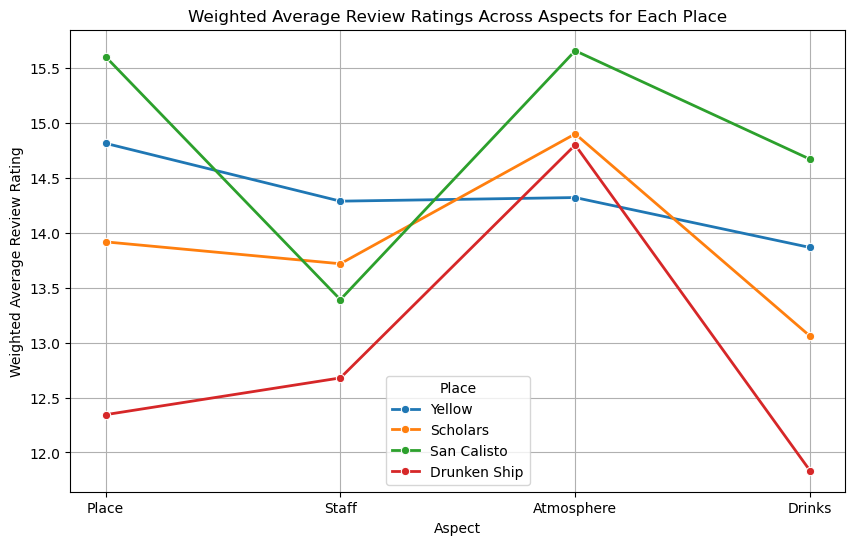

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define places and their aspects with weighting factors
places = {
    "Yellow": {"Place": (YLPlc, 3.4), "Staff": (YLStf, 3.3), "Atmosphere": (YLAtm, 3.3), "Drinks": (YLDr, 3.2)},
    "Scholars": {"Place": (SCPlc, 3.4), "Staff": (SCStf, 3.3), "Atmosphere": (SCAtm, 3.3), "Drinks": (SCDr, 3.2)},
    "San Calisto": {"Place": (SNPlc, 3.4), "Staff": (SNStf, 3.3), "Atmosphere": (SNAtm, 3.3), "Drinks": (SNDr, 3.2)},
    "Drunken Ship": {"Place": (DSPlc, 3.4), "Staff": (DSStf, 3.3), "Atmosphere": (DSAtm, 3.3), "Drinks": (DSDr, 3.2)},
}

# Prepare data for Seaborn
data = {
    "Place": [],
    "Aspect": [],
    "Average Review Rating": []
}

for place_name, aspects in places.items():
    for aspect_name, (df, weight) in aspects.items():
        avg_rating = df["review_rating"].mean() * weight  # Apply weight
        data["Place"].append(place_name)
        data["Aspect"].append(aspect_name)
        data["Average Review Rating"].append(avg_rating)

# Convert to DataFrame
df_plot = pd.DataFrame(data)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, x="Aspect", y="Average Review Rating", hue="Place", marker="o", linewidth=2)

# Customize the plot
plt.xlabel("Aspect")
plt.ylabel("Weighted Average Review Rating")
plt.title("Weighted Average Review Ratings Across Aspects for Each Place")
plt.legend(title="Place")
plt.grid(True)

# Show plot
plt.show()
